In [1]:
from seisLM.data_pipeline.foreshock_aftershock_dataset import (
  create_foreshock_aftershock_datasets
)
from seisLM.data_pipeline.foreshock_aftershock_dataloaders import (
  prepare_foreshock_aftershock_dataloaders)
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
NUM_CLASSES = 4
BATCH_SIZE = 8
EVENT_SPLIT_METHOD = 'temporal'
COMPONENT_ORDER = 'ZNE'
DIMENSION_ORDER = 'NCW'

# Examine the loader


Seed set to 42
Seed set to 42


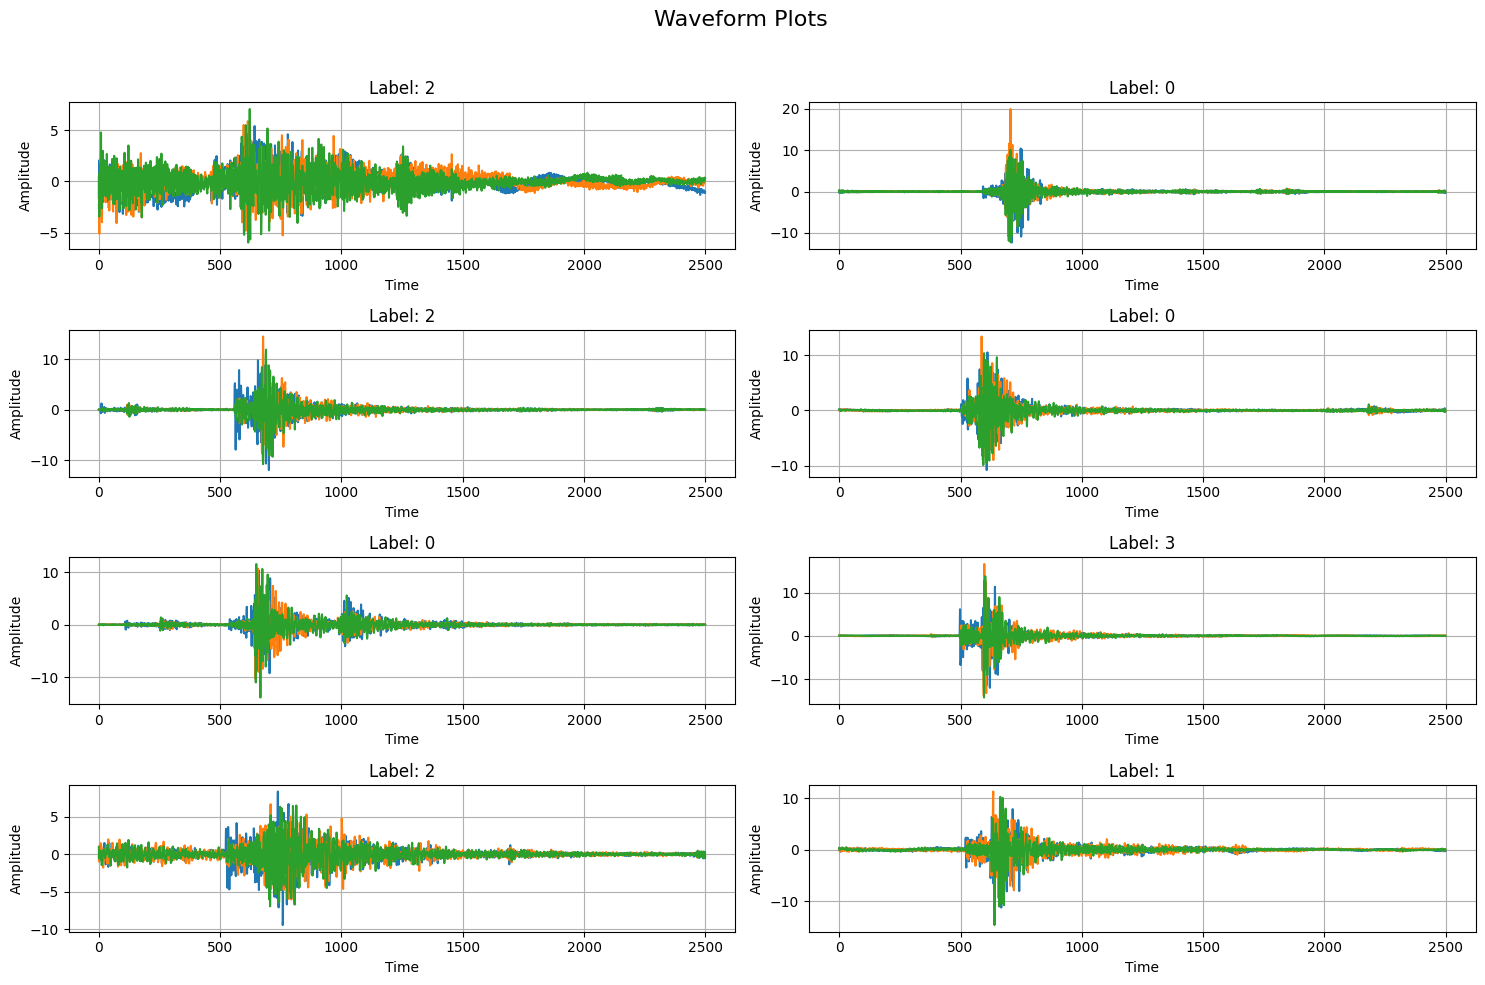

In [5]:
loaders = prepare_foreshock_aftershock_dataloaders(
  num_classes=NUM_CLASSES,
  batch_size=BATCH_SIZE,
  event_split_method=EVENT_SPLIT_METHOD,
  component_order=COMPONENT_ORDER,
  # standardize=True,
  demean = False,
  devide_by_std = True#False,
  # amp_norm_type='peak',
  # demean_axis=None,
  # amp_norm_type='std',
)

waveforms, labels = next(iter(loaders['train']))

# Create a figure with 8 subplots
fig, axs = plt.subplots(4, 2, figsize=(15, 10))
fig.suptitle('Waveform Plots', fontsize=16)

# Plot each waveform in a separate subplot
for i in range(8):
    ax = axs[i // 2, i % 2]  # Compute subplot index
    ax.plot(waveforms[i].T)
    ax.set_title(f'Label: {labels[i].item()}')
    ax.set_xlabel('Time')
    ax.set_ylabel('Amplitude')
    ax.grid(True)

# Adjust layout for better spacing
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Show the plot
plt.show()

# examine the dataset directly


In [4]:
  datasets = create_foreshock_aftershock_datasets(
    num_classes=NUM_CLASSES,
    event_split_method=EVENT_SPLIT_METHOD,
    component_order=COMPONENT_ORDER,
    dimension_order=DIMENSION_ORDER,
    seed=42,
    remove_class_overlapping_dates=True,
  )


Seed set to 42
Seed set to 42


In [5]:
import numpy as np


for remove_class_overlapping_dates in [True, False]:
  print(f'Remove class overlapping dates: {remove_class_overlapping_dates}')
  datasets = create_foreshock_aftershock_datasets(
    num_classes=NUM_CLASSES,
    event_split_method=EVENT_SPLIT_METHOD,
    component_order=COMPONENT_ORDER,
    dimension_order=DIMENSION_ORDER,
    seed=42,
    remove_class_overlapping_dates=remove_class_overlapping_dates,
  )

  fold = 'train'
  y = datasets[fold]['y']
  X = datasets[fold]['X']
  occurence_time = datasets[fold]['occurence_time']

  num_classes = NUM_CLASSES

  # Initialize a dictionary to store categorized data
  categorized_X = {i: X[y == i] for i in range(num_classes)}
  categorized_y = {i: y[y == i] for i in range(num_classes)}
  categorized_time = {i: np.array(occurence_time)[y == i] for i in range(num_classes)}

  for class_idx in range(num_classes):
    print(f'Class {class_idx}, num samples: {len(categorized_X[class_idx])}')
    print(f'start time: {np.sort(categorized_time[class_idx])[0]}, end time: {np.sort(categorized_time[class_idx])[-1]}\n')



Remove class overlapping dates: True


Seed set to 42
Seed set to 42


Class 0, num samples: 1264
start time: 2016-08-20 12:07:54, end time: 2016-09-18 22:18:12

Class 1, num samples: 1209
start time: 2016-09-20 03:16:19, end time: 2016-10-26 14:49:12

Class 2, num samples: 1226
start time: 2016-10-31 00:02:27, end time: 2016-11-23 23:54:45

Class 3, num samples: 1204
start time: 2016-11-25 00:02:37, end time: 2016-12-20 07:10:44

Remove class overlapping dates: False


Seed set to 42
Seed set to 42


Class 0, num samples: 1268
start time: 2016-08-20 12:07:54, end time: 2016-09-19 02:44:11

Class 1, num samples: 1268
start time: 2016-09-19 02:53:41, end time: 2016-10-26 14:49:12

Class 2, num samples: 1268
start time: 2016-10-31 00:02:27, end time: 2016-11-24 10:15:42

Class 3, num samples: 1268
start time: 2016-11-24 10:24:48, end time: 2016-12-20 07:10:44



In [6]:
# from collections import defaultdict

# data = datasets['train']


# def remove_class_overlapping_dates(data):
#   """ Remove dates that exist in multiple classes from the dataset."""

#   # For each date, record the classes that appear on that date.
#   date_to_classes = defaultdict(set)
#   for timestamp, label in zip(data['occurence_time'], data['y']):
#     date_to_classes[timestamp.date()].add(label)

#     # A single date cannot be in more than two classes;
#     # if it is, the dataset is prepared incorrectly.
#     assert len(date_to_classes[timestamp.date()]) <= 2


#   # Identify dates that appear in more than one class
#   dates_in_multiple_classes = {
#     date for date, classes in date_to_classes.items() if len(classes) > 1
#   }

#   # Filter out entries with dates in multiple classes
#   filtered_X = []
#   filtered_y = []
#   filtered_occurence_time = []

#   for x, y, timestamp in zip(data['X'], data['y'], data['occurence_time']):
#     if timestamp.date() not in dates_in_multiple_classes:
#       filtered_X.append(x)
#       filtered_y.append(y)
#       filtered_occurence_time.append(timestamp)

#   filtered_X = np.array(filtered_X)
#   filtered_y = np.array(filtered_y)

#   return filtered_X, filtered_y, filtered_occurence_time


# # # Extract dates and group by class labels
# # date_to_classes = defaultdict(set)
# # for timestamp, label in zip(data['occurence_time'], data['y']):
# #     date_to_classes[timestamp.date()].add(label)

# # # Identify dates that appear in more than one class
# # dates_in_multiple_classes = {date for date, classes in date_to_classes.items() if len(classes) > 1}

# # # # Filter out entries with dates in multiple classes
# # filtered_X = []
# # filtered_y = []
# # filtered_occurence_time = []

# # for x, y, timestamp in zip(data['X'], data['y'], data['occurence_time']):
# #     if timestamp.date() not in dates_in_multiple_classes:
# #         filtered_X.append(x)
# #         filtered_y.append(y)
# #         filtered_occurence_time.append(timestamp)

# # filtered_X = np.array(filtered_X)
# # filtered_y = np.array(filtered_y)
# # # Update the data dictionary
# # data['X'] = filtered_X
# # data['y'] = filtered_y
# # data['occurence_time'] = filtered_occurence_time

# # # Display results
# # print("Filtered X:")
# # for x in data['X']:
# #     print(x)

# # print("\nFiltered y:")
# # print(data['y'])

# # print("\nFiltered occurence_time:")
# # for ts in data['occurence_time']:
# #     print(ts)


In [7]:
# y = filtered_y
# X = filtered_X
# occurence_time = filtered_occurence_time


# # Initialize a dictionary to store categorized data
# categorized_X = {i: X[y == i] for i in range(num_classes)}
# # categorized_time = {i: datasets['train']['occurence_time'][y == i] for i in range(num_classes)}
# categorized_y = {i: y[y == i] for i in range(num_classes)}
# categorized_time = {i: np.array(occurence_time)[y == i] for i in range(num_classes)}

# for class_idx in range(num_classes):
#   print(f'Class {class_idx}, num samples: {len(categorized_X[class_idx])}')
#   print(f'start time: {np.sort(categorized_time[class_idx])[0]}')
#   print(f'end time: {np.sort(categorized_time[class_idx])[-1]}')


In [8]:
np.array(filtered_X).shape

NameError: name 'filtered_X' is not defined

In [ ]:
categorized_time

{0: array(Timestamp('2016-09-25 21:15:43'), dtype=object),
 1: array(Timestamp('2016-09-25 21:15:43'), dtype=object),
 2: array(Timestamp('2016-09-25 21:15:43'), dtype=object),
 3: array(Timestamp('2016-09-25 21:15:43'), dtype=object)}

In [ ]:
len(data['X'])

5072

In [ ]:
dates_in_multiple_classes

{datetime.date(2016, 9, 19), datetime.date(2016, 11, 24)}